In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

import control as cm
from helperFunctions import *
setPlotStyle()


 ## Your own transfer function toolbox

 Now lets make it more interesting! We'll plot the few simple transfer function 'blocks' as I mentioned earlier:

 - a constant gain, $k_1$,

 - a real pole, $p_1$,

 - a real zero, $z_1$,

 - a complex pole pair, with natural frequency $\omega_p$ and damping ration $\zeta_p$,

 - a complex zero pair, with natural frequency $\omega_z$ and damping ration $\zeta_z$,

 - a time-delay, $e^{-\tau_1 s}$, that delays with $\tau_1$ time

 I add some extra gridlines here, to give a little more feeling for the symmetrix log scale: Constant magnitude circles, and radial lines at angles $[\frac14\pi, \frac12\pi, \frac34\pi]$.

<IPython.core.display.Javascript object>

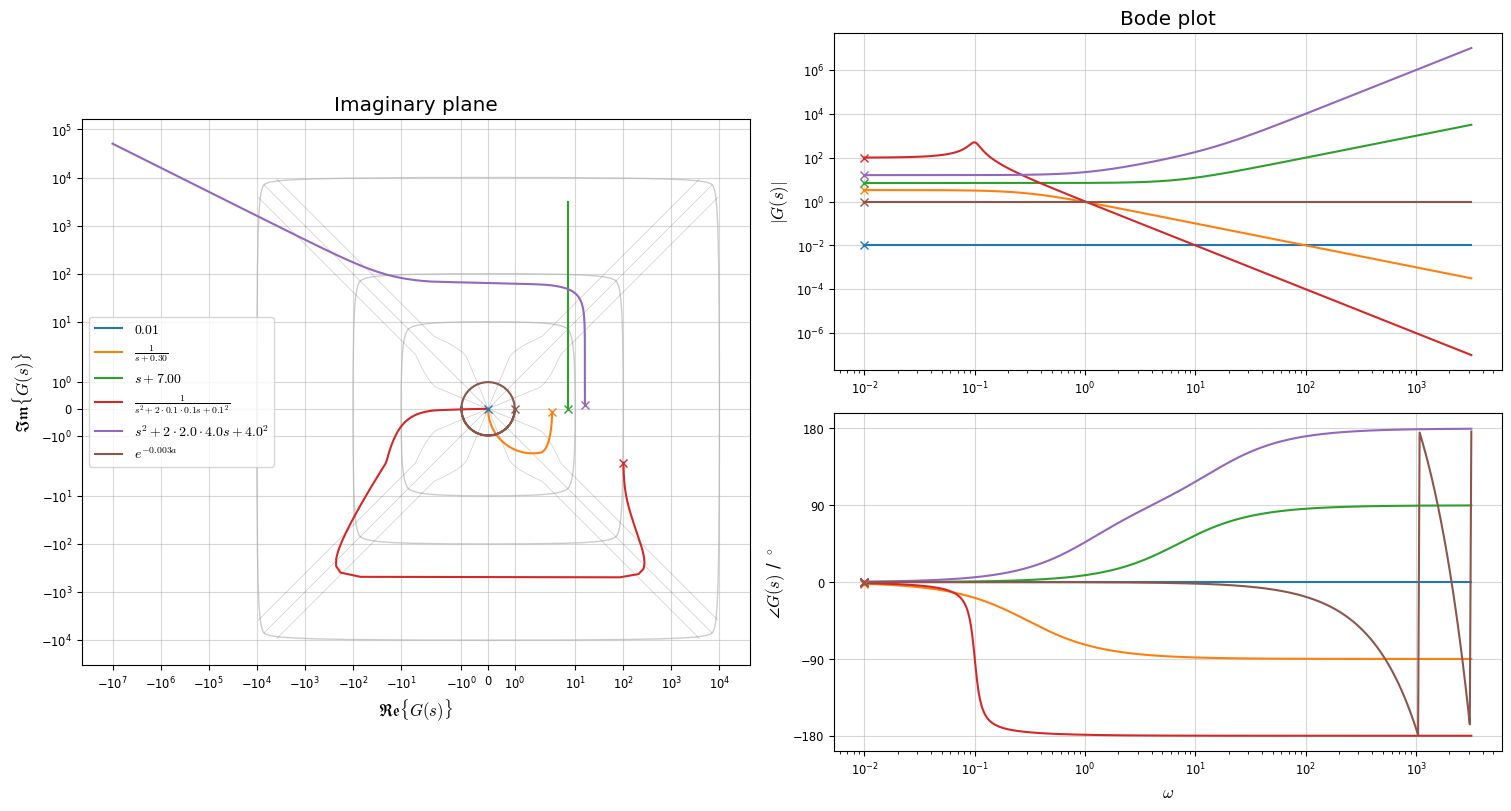

In [2]:
k1, p1, z1 = 1e-2, 0.3, 7.                  #CHANGEME
om_p, zeta_p, om_z, zeta_z = .1, .1, 4., 2. #CHANGEME
tau1 = 3e-3                                 #CHANGEME

OM = np.logspace(-2, 3.5, 400)
S = OM*1j

s = cm.tf('s')
G2 = [lambda s : k1 * np.ones_like(s), # Constant gain
      lambda s : 1 / (s + p1), # Real pole
      lambda s : (s + z1), # Real zero
      lambda s : 1 / (s**2 + 2* zeta_p * om_p * s + om_p**2), # Comlex pole pair
      lambda s : (s**2 + 2* zeta_z * om_z * s + om_z**2), # Complex zero pair
      lambda s : np.exp(-tau1 * s)] # Time delay
G2_eval = [G(S) for G in G2]

### Plotting ###
fig = plt.figure(num="Bode plot blocks")
gs = GridSpec(2,2, figure=fig)
ax = [fig.add_subplot(a) for a in [gs[:, 0], gs[0, 1], gs[1, 1]]]
setGridPolar(ax[0], Mticks=[0, 1, 2, 4], Np=8)

for G_eval in G2_eval:
    ax[0].plot(G_eval.real, G_eval.imag)
    ax[1].loglog(OM, np.abs(G_eval))[0]
    ax[2].semilogx(OM, np.angle(G_eval, deg=True))

ax[0].legend([rf"${k1:.2f}$",
              rf"$\frac{"{"}1{"}"}{"{"}s + {p1:.2f}{"}"}$",
              rf"$s + {z1:.2f}$",
              rf"$\frac{"{"}1{"}"}{"{"}s^2 + 2 \cdot {zeta_p:.1f} \cdot {om_p:.1f}s + {om_p:.1f}^2{"}"}$",
              rf"$s^2 + 2 \cdot {zeta_z:.1f} \cdot {om_z:.1f}s + {om_z:.1f}^2$",
              rf"$e^{"{"}-{tau1:.3f}a{"}"}$",
              ], fontsize='small')

for G_eval, idx in zip(G2_eval, range(len(G2_eval))):
    ax[0].plot(G_eval[0].real, G_eval[0].imag, 'x', c=f"C{idx}")
    ax[1].loglog(OM[0], np.abs(G_eval[0]), 'x', c=f"C{idx}")
    ax[2].semilogx(OM[0], np.angle(G_eval[0], deg=True), 'x', c=f"C{idx}")

ax[0].set(title="Imaginary plane", 
          xlabel="$\mathfrak{Re}\{G(s)\}$", ylabel="$\mathfrak{Im}\{G(s)\}$", 
          xscale='symlog', yscale='symlog', aspect='equal')
ax[1].set(title="Bode plot", ylabel = "$|G(s)|$")
ax[2].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[2].yaxis.set_major_locator(MultipleLocator(90))

display(fig)


 That plot is a lot to take in, I do admit. However, the take-aways are:

 - poles and zeros are each other inverses,

 - the pole/zero blocks here all show three regions, when the constant term dominates, a transition region, and when the varying term part dominates,

 - a pole at a certain frequency initiates a slope down with steepness 1 and gains 90 degrees phase,

 - a zero at a certain frequency initiates a slope up with steepness 1 and loses 90 degrees phase,

 - therefore, any pole is a lowpass filter and any zero is a highpass filter,,

 - more therefore, connecting back to the Laplace transform: integrating ($\frac{1}{s}$) is a pole at $s=0$ and a lowpass filter, and differentiating ($s$) is a zero at $s=0$ and a highpass filter,

 - also, complex pairs double the steepness and phase change,

 - the behaviour of a complex pair in its transition region around the natural frequency depends on the damping ratio, we'll investigate that more now.



 In this case we'll look at zero pairs, but you just learned that pole pairs just flip the zero pair bode plot.

<IPython.core.display.Javascript object>

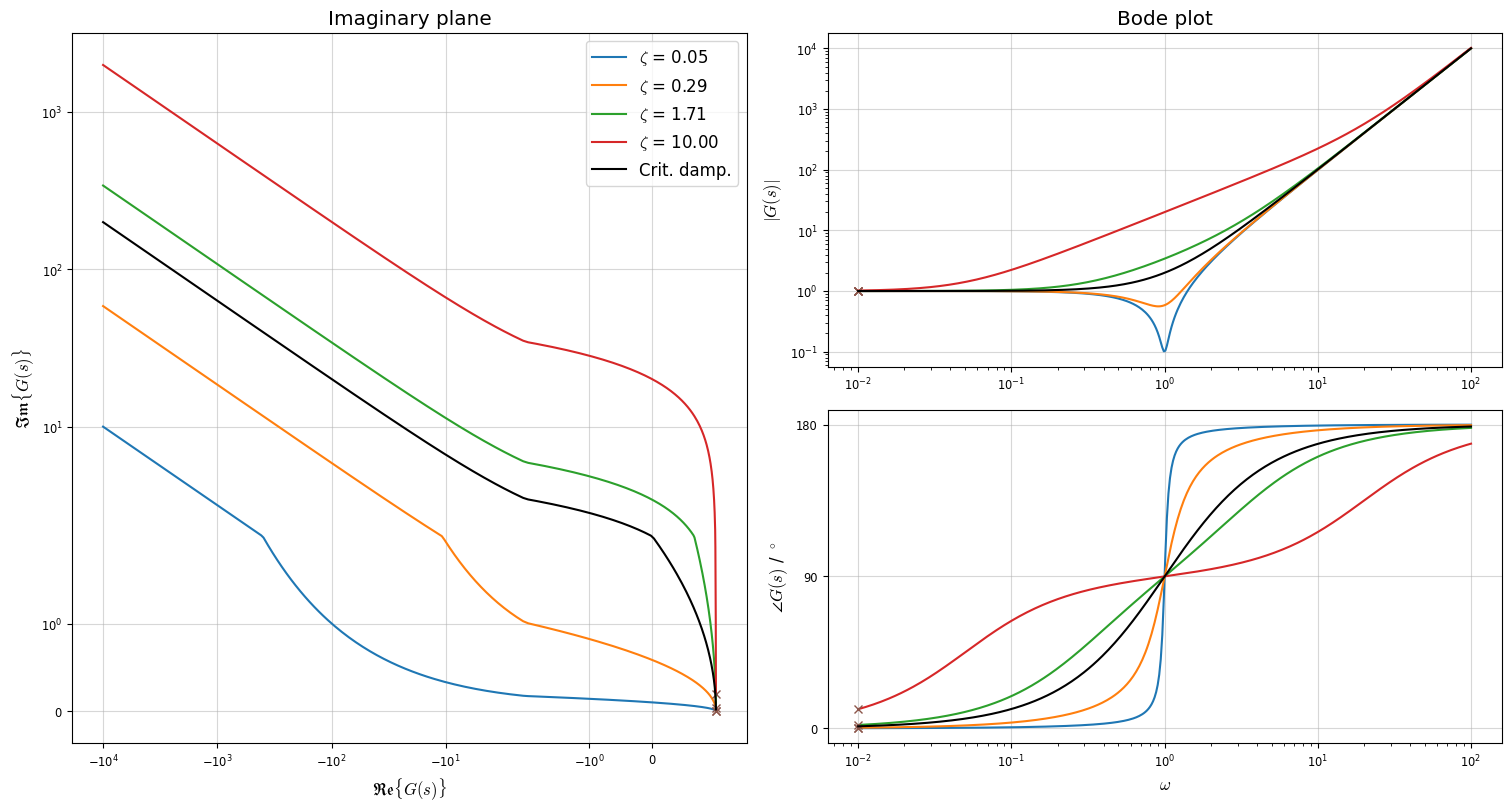

In [3]:
OM = np.logspace(-2, 2, 400)
S = OM*1j

om1 = 1. 

fig = plt.figure(num="Damping ratio TF")
gs = GridSpec(2,2, figure=fig)
ax = [fig.add_subplot(a) for a in [gs[:, 0], gs[0, 1], gs[1, 1]]]

hnd = []
for zeta in np.geomspace(0.05, 10., num=4):
    G_eval = (S**2 + 2* zeta * om1 * S + om1**2)
    
    ax[0].plot(G_eval.real, G_eval.imag)
    hnd.append(
        ax[1].loglog(OM, np.abs(G_eval), label = rf"$\zeta$ = {zeta:.2f}")[0]
    )
    ax[2].semilogx(OM, np.angle(G_eval, deg=True))
    
    ax[0].plot(G_eval[0].real, G_eval[0].imag, 'x', c=f"C{idx}")
    ax[1].loglog(OM[0], np.abs(G_eval[0]), 'x', c=f"C{idx}")
    ax[2].semilogx(OM[0], np.angle(G_eval[0], deg=True), 'x', c=f"C{idx}")

G_eval = (S**2 + 2.* 1. * om1 * S + om1**2)

ax[0].plot(G_eval.real, G_eval.imag, 'k')
hnd.append(
    ax[1].loglog(OM, np.abs(G_eval), 'k', label = rf"Crit. damp.")[0]
)
ax[2].semilogx(OM, np.angle(G_eval, deg=True), 'k')

ax[0].set(title="Imaginary plane", 
          xlabel="$\mathfrak{Re}\{G(s)\}$", ylabel="$\mathfrak{Im}\{G(s)\}$", 
          xscale='symlog', yscale='symlog')
ax[0].legend(handles=hnd)
ax[1].set(title="Bode plot", ylabel = "$|G(s)|$")
ax[2].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[2].yaxis.set_major_locator(MultipleLocator(90))

display(fig)


 ### Combining transfer function blocks

 We're going to design three filters here to wrap up: a notch filter, a lead-lag filter and a PID! First the notch, it consists of a pole pair and a zero pair with the same natural frequency, but different damping ratios. I'll also stop plotting the complex plane, you get the link by now.

<IPython.core.display.Javascript object>

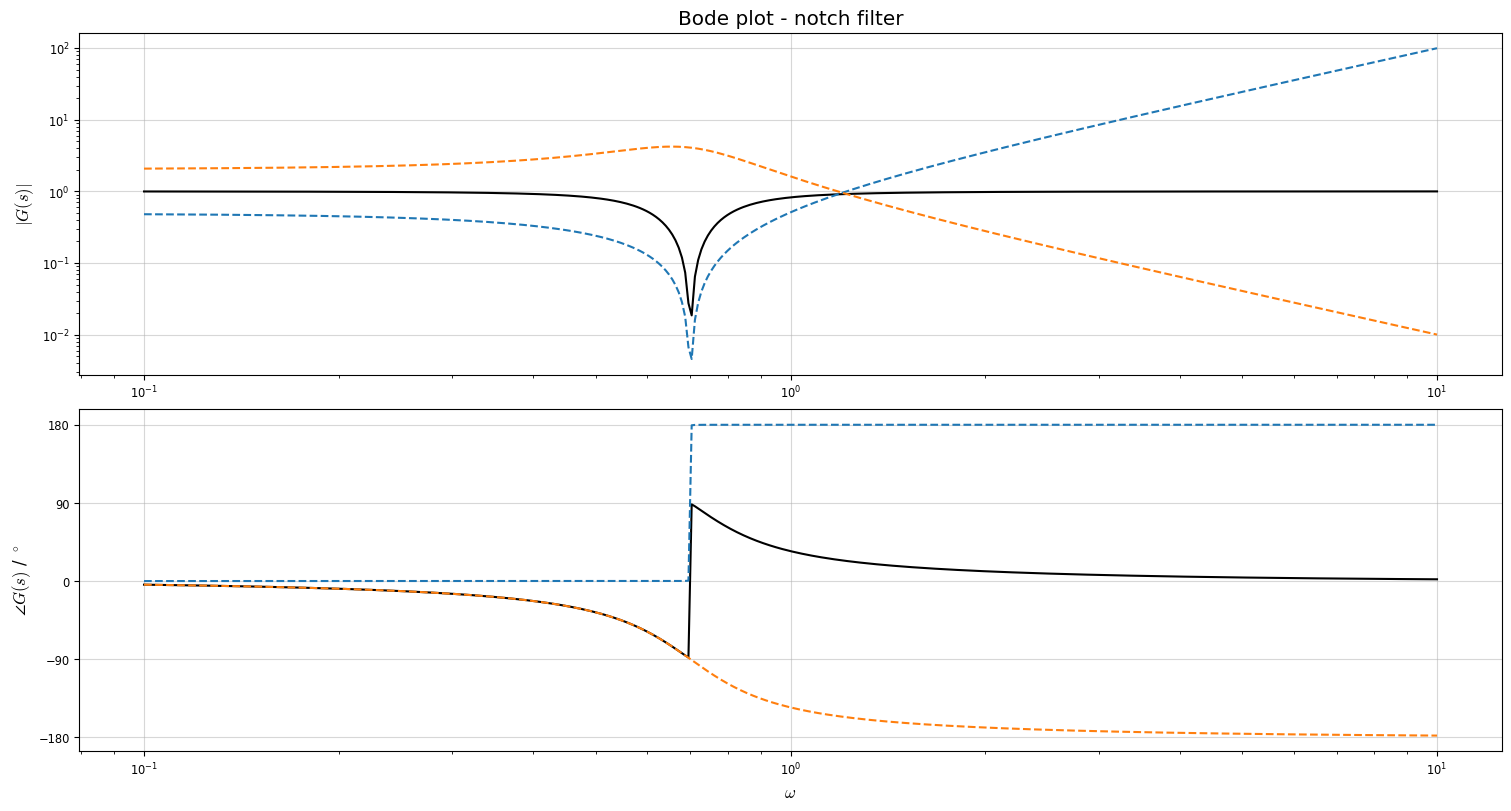

In [4]:
om_n, zeta_p, zeta_z = 0.7, 5e-1, 1e-4

OM = np.logspace(-1, 1, 400)
S = OM*1j

G_leadlag_eval_z = (S**2 + zeta_z * om_n * S + om_n**2)
G_leadlag_eval_p = 1/ (S**2 + zeta_p * om_n * S + om_n**2)
G_leadlag_eval = G_leadlag_eval_z * G_leadlag_eval_p

fig, ax = plt.subplots(2,1)
ax[0].loglog(OM, np.abs(G_leadlag_eval), 'k')
ax[0].loglog(OM, np.abs(G_leadlag_eval_z), '--')
ax[0].loglog(OM, np.abs(G_leadlag_eval_p), '--')
ax[1].semilogx(OM, np.angle(G_leadlag_eval, deg=True), 'k')
ax[1].semilogx(OM, np.angle(G_leadlag_eval_z, deg=True), '--')
ax[1].semilogx(OM, np.angle(G_leadlag_eval_p, deg=True), '--')

ax[0].set(title="Bode plot - notch filter", ylabel = "$|G(s)|$")
ax[1].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[1].yaxis.set_major_locator(MultipleLocator(90))

display(fig)


 You can figure out yourself what color is the poles/zeros <3. Notice how the curves can be 'added' when in reality they're multiplied, because they're plotted on a log scale.



 Now the lead lag: it also consists of a pole pair and a zero pair, but with different natural frequencies and the same damping ratio, and we need to compensate the steady state gain (for $\omega = 0$):

<IPython.core.display.Javascript object>

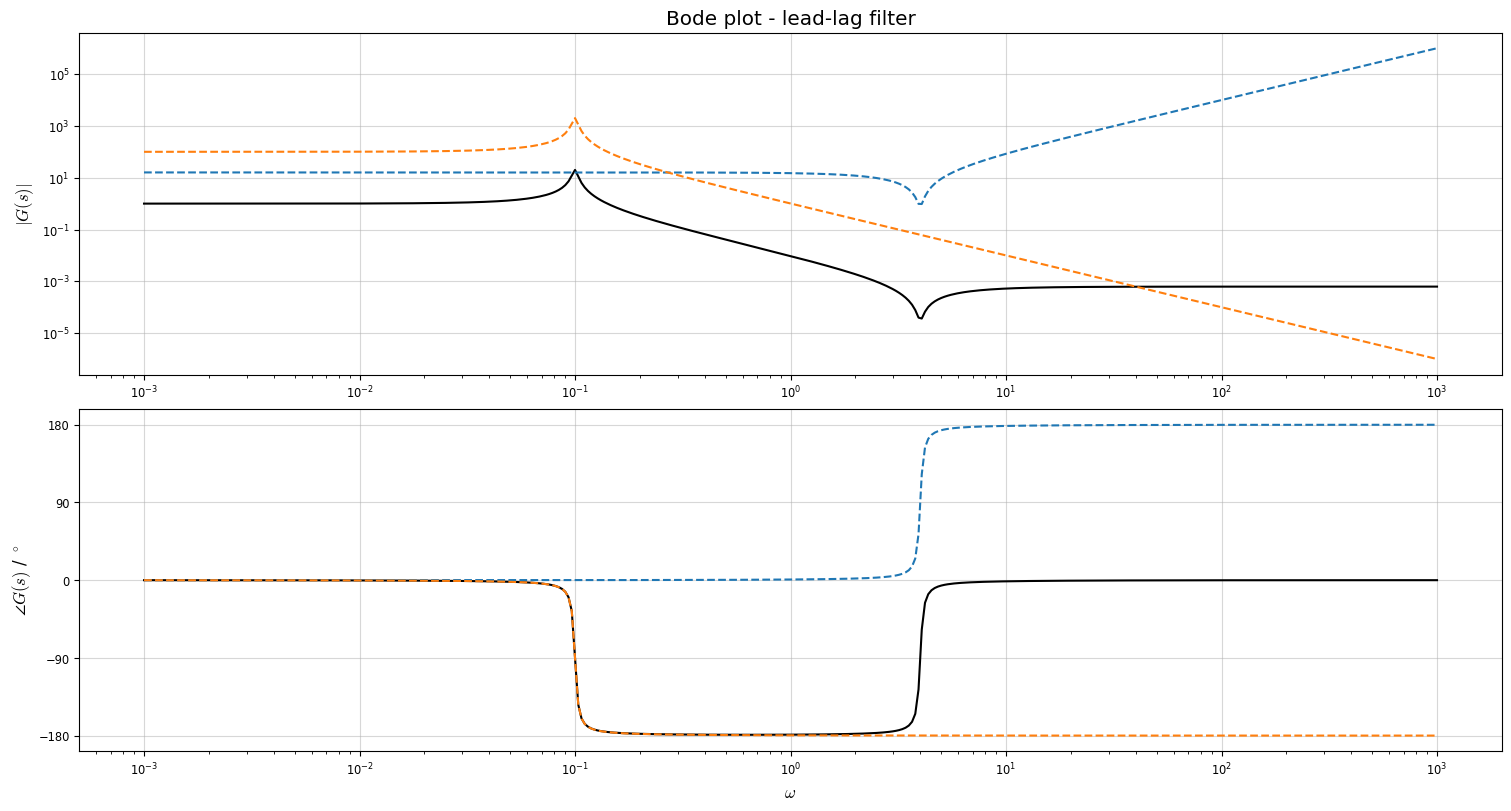

In [5]:
om_p, om_z, zeta1 = .1, 4., 0.05
k2 = om_p**2 / om_z**2

OM = np.logspace(-3, 3, 400)
S = OM*1j

G_leadlag_eval_z = (S**2 + zeta1 * om_z * S + om_z**2)
G_leadlag_eval_p = 1/ (S**2 + zeta1 * om_p * S + om_p**2)
G_leadlag_eval = G_leadlag_eval_z * G_leadlag_eval_p * k2

fig, ax = plt.subplots(2,1)
ax[0].loglog(OM, np.abs(G_leadlag_eval), 'k')
ax[0].loglog(OM, np.abs(G_leadlag_eval_z), '--')
ax[0].loglog(OM, np.abs(G_leadlag_eval_p), '--')
ax[1].semilogx(OM, np.angle(G_leadlag_eval, deg=True), 'k')
ax[1].semilogx(OM, np.angle(G_leadlag_eval_z, deg=True), '--')
ax[1].semilogx(OM, np.angle(G_leadlag_eval_p, deg=True), '--')

ax[0].set(title="Bode plot - lead-lag filter", ylabel = "$|G(s)|$")
ax[1].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[1].yaxis.set_major_locator(MultipleLocator(90))

display(fig)


 To summarise these configurations of 2nd order systems:



 ![2nd order systems table](../figures/secondOrderTFs.svg)



 Next, one of the simplest (and most effective) controllers is the PID controller (any controller is secretely a filter). But we have to cast the standard expression into blocks we know:

 $$ K_p + \frac{K_i}{s} + K_d s = \frac{K_p s + K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}.$$

 So that means one pole at 0 and two zeros:

<IPython.core.display.Javascript object>

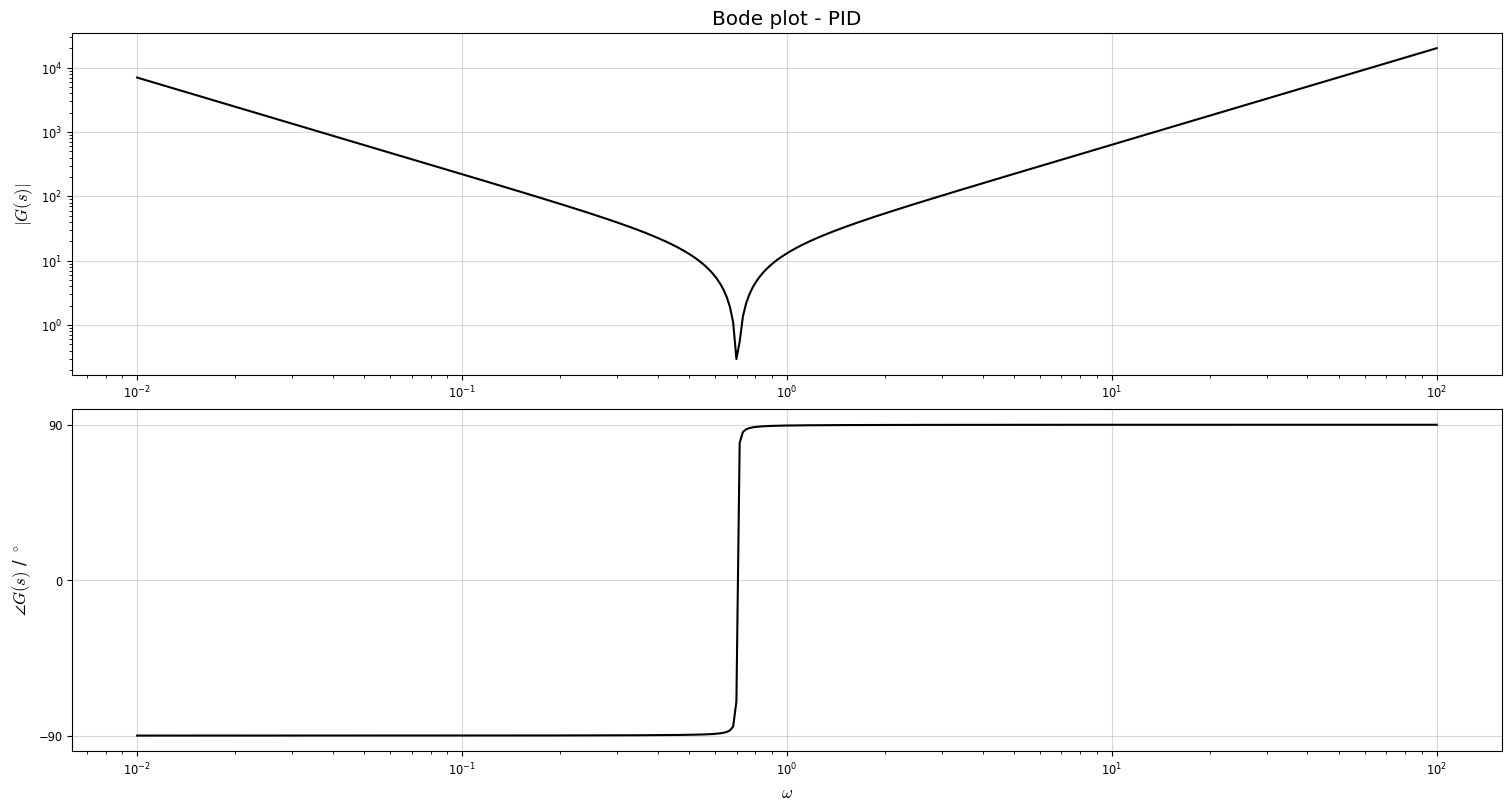

In [6]:
Kp1, Ki1, Kd1 = .1, 7., 20.
PID1 = (Kd1 * S**2 + Kp1 * S + Ki1) / S

OM = np.logspace(-2, 2, 400)
S = OM*1j

fig, ax = plt.subplots(2,1)
ax[0].loglog(OM, np.abs(PID1), 'k')
ax[1].semilogx(OM, np.angle(PID1, deg=True), 'k')

ax[0].set(title="Bode plot - PID", ylabel = "$|G(s)|$")
ax[1].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[1].yaxis.set_major_locator(MultipleLocator(90))

display(fig)
